In [2]:
!pip install keras tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from tensorflow.keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from past.builtins import xrange
import scipy

In [3]:
# image specification
img_rows,img_cols,img_depth=50,50,3

x_tr = []
x_count=[]

In [4]:
#only for count
listing = os.listdir('BanglaLekha-Isolated/Images/')
cou=0
for vid in listing:
    listing2 = os.listdir('BanglaLekha-Isolated/Images/'+vid)
    for vid2 in listing2:
        cou +=1
print(cou)

166105


In [5]:
listing = os.listdir('BanglaLekha-Isolated/Images/')
for vid in listing:
    print(vid)
    counter =0
    listing2 = os.listdir('BanglaLekha-Isolated/Images/'+vid)
    count2=0
    for vid2 in listing2:
        frames = []
        for k in xrange(3):
            img_array = cv2.imread('BanglaLekha-Isolated/Images/'+vid+'/'+vid2)  # convert to array
            frame=cv2.resize(img_array,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
        input=np.array(frames)
        #print input.shape
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        #print ipt.shape
        x_tr.append(ipt)
        counter +=1
        count2 +=1
        if count2 >= 1000:
            break;
    x_count.append([counter,int(vid)])

1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
9


In [6]:
X_tr_array = np.array(x_tr)
num_samples = len(X_tr_array)
print(num_samples)

84000


In [7]:
x_count

[[1000, 1],
 [1000, 10],
 [1000, 11],
 [1000, 12],
 [1000, 13],
 [1000, 14],
 [1000, 15],
 [1000, 16],
 [1000, 17],
 [1000, 18],
 [1000, 19],
 [1000, 2],
 [1000, 20],
 [1000, 21],
 [1000, 22],
 [1000, 23],
 [1000, 24],
 [1000, 25],
 [1000, 26],
 [1000, 27],
 [1000, 28],
 [1000, 29],
 [1000, 3],
 [1000, 30],
 [1000, 31],
 [1000, 32],
 [1000, 33],
 [1000, 34],
 [1000, 35],
 [1000, 36],
 [1000, 37],
 [1000, 38],
 [1000, 39],
 [1000, 4],
 [1000, 40],
 [1000, 41],
 [1000, 42],
 [1000, 43],
 [1000, 44],
 [1000, 45],
 [1000, 46],
 [1000, 47],
 [1000, 48],
 [1000, 49],
 [1000, 5],
 [1000, 50],
 [1000, 51],
 [1000, 52],
 [1000, 53],
 [1000, 54],
 [1000, 55],
 [1000, 56],
 [1000, 57],
 [1000, 58],
 [1000, 59],
 [1000, 6],
 [1000, 60],
 [1000, 61],
 [1000, 62],
 [1000, 63],
 [1000, 64],
 [1000, 65],
 [1000, 66],
 [1000, 67],
 [1000, 68],
 [1000, 69],
 [1000, 7],
 [1000, 70],
 [1000, 71],
 [1000, 72],
 [1000, 73],
 [1000, 74],
 [1000, 75],
 [1000, 76],
 [1000, 77],
 [1000, 78],
 [1000, 79],
 [1000

In [8]:
X_tr_array.shape


(84000, 50, 50, 3)

In [9]:
# Assign Label to each class
label=np.ones((len(X_tr_array),),dtype = int)
minimum=0
maximum=-1
count=0
for i in range(len(x_count)):
    maximum += x_count[i][0]
    #print([minimum,maximum])
    label[minimum:maximum]= count
    minimum +=x_count[i][0]
    count +=1

In [10]:
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (84000, 50, 50, 3)


In [11]:
train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in xrange(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]

In [12]:
patch_size = 15   

print(train_set.shape, 'train samples')

(84000, 1, 50, 50, 3) train samples


In [13]:
# CNN Training parameters

batch_size = 100
nb_classes = len(x_count)
nb_epoch = 5

In [14]:
import os
os.listdir('BanglaLekha-Isolated/Images/')

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '9']

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

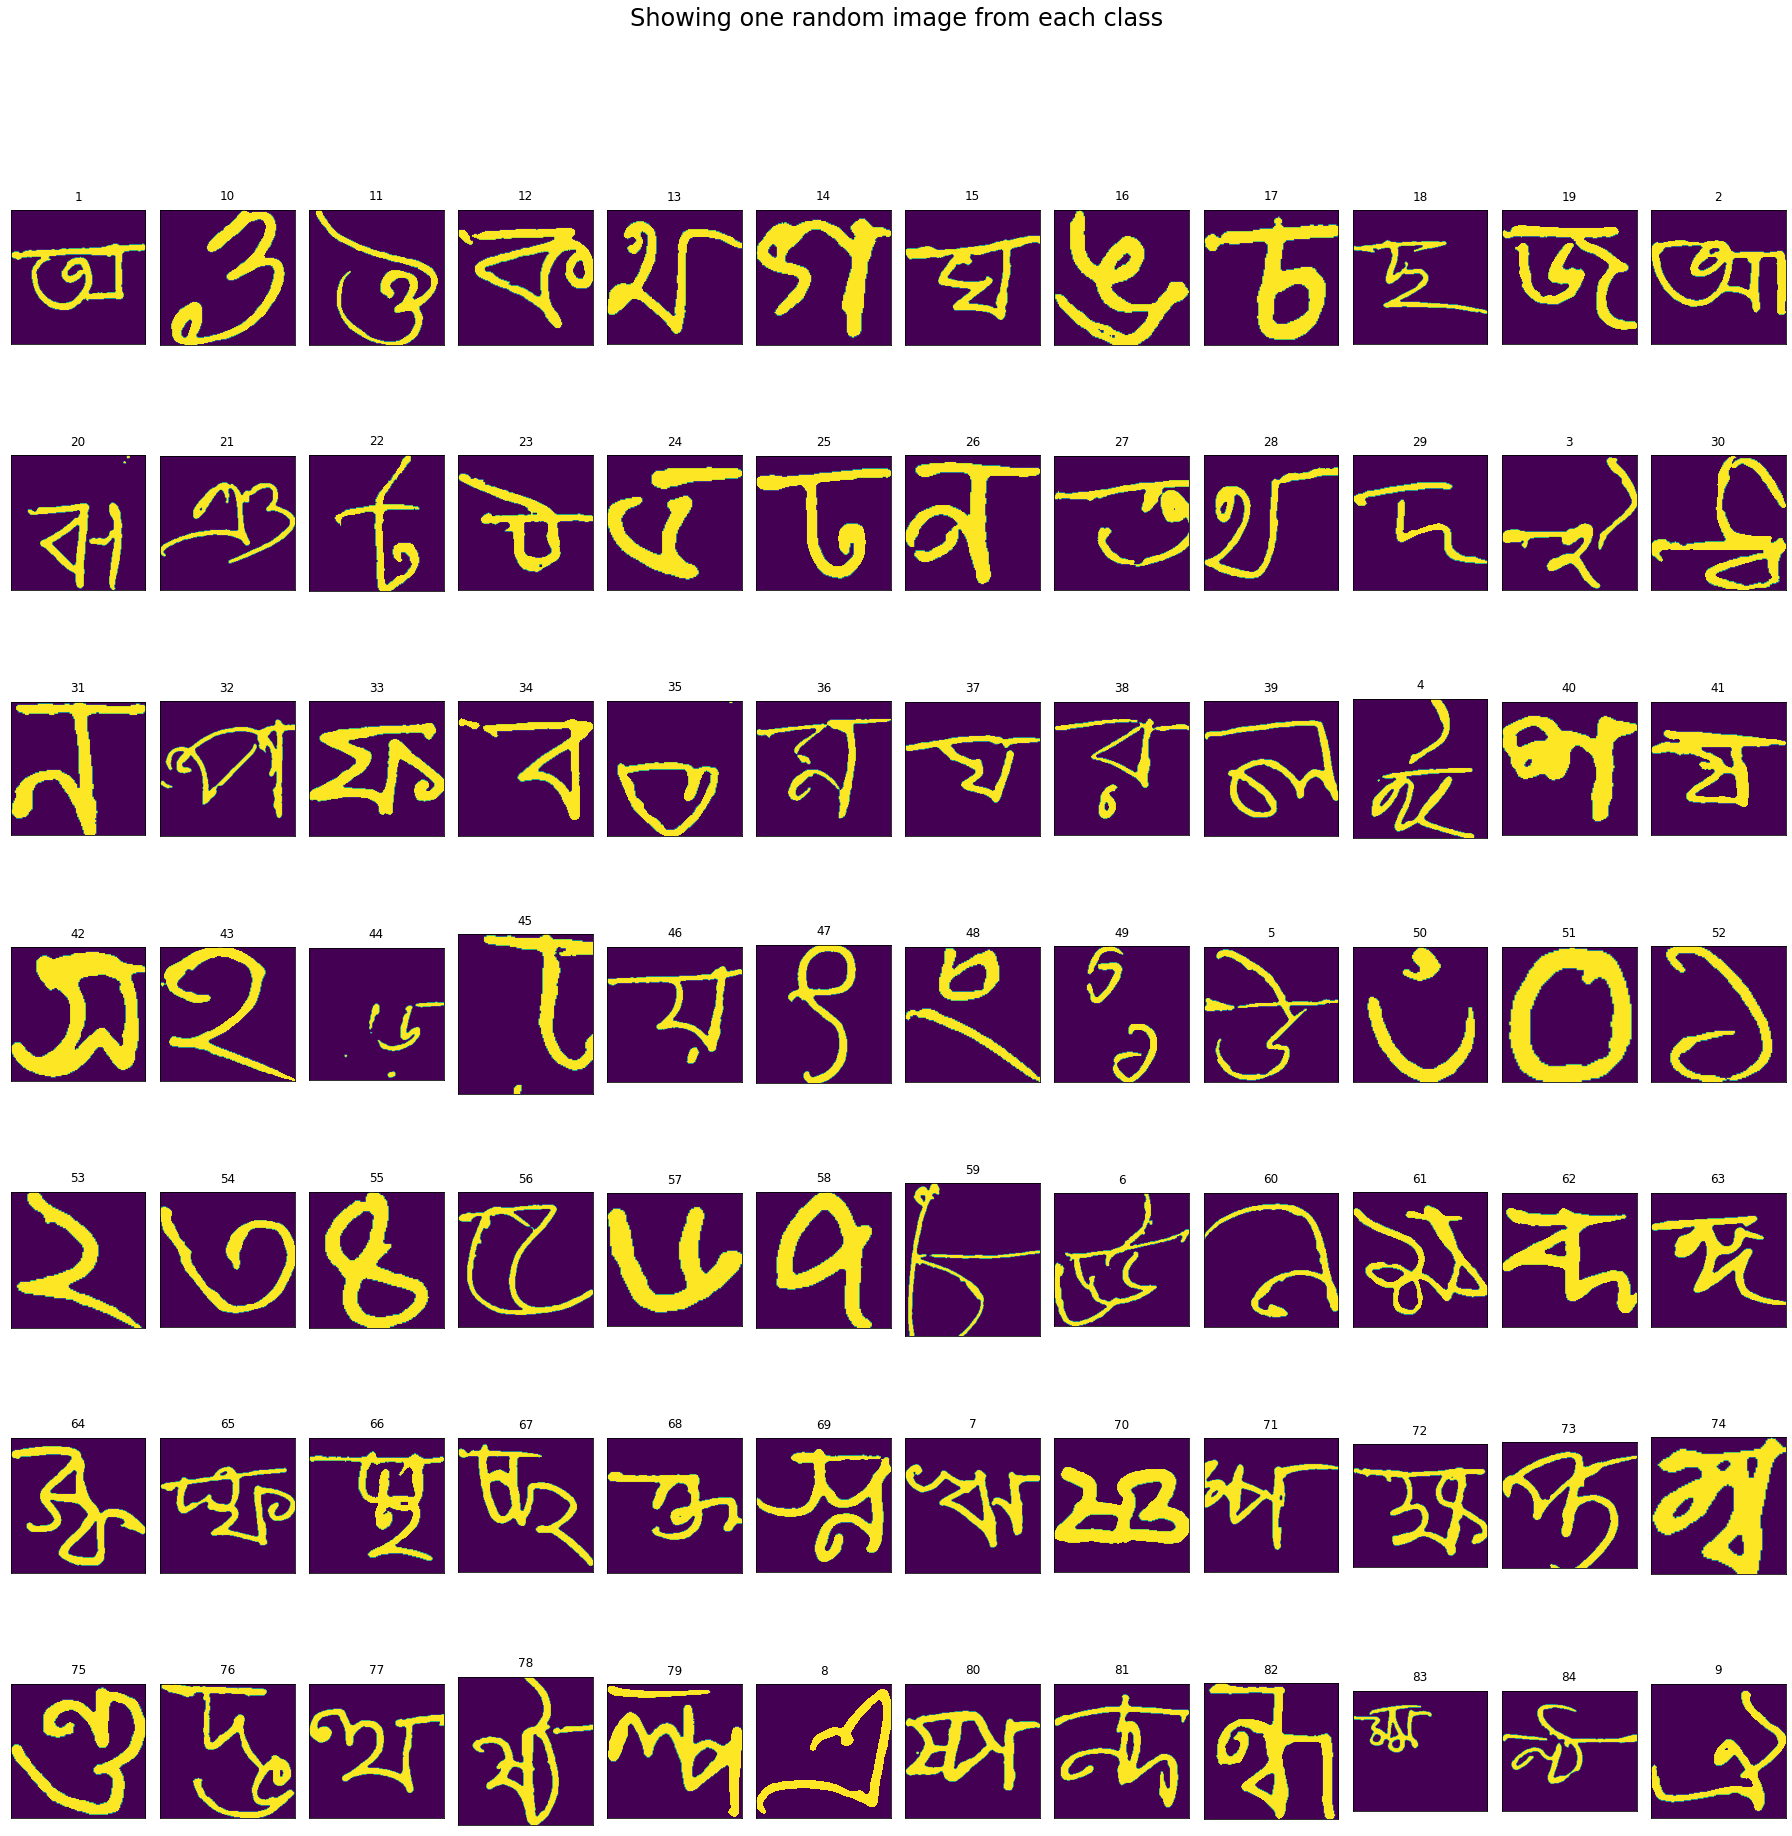

In [16]:
# Visualize the data, showing one image per class from 10 classes
rows = 7
cols = 12
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24)
data_dir = "BanglaLekha-Isolated/Images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected))
    food_selected_random = np.random.choice(food_selected_images)
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [17]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


# number of convolutional filters to use at each layer
nb_filters = [  32,   # 1st conv layerlearning_rate
                32    # 2nd
             ]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]
# Pre-processing
train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

In [18]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [19]:
char_list = os.listdir('BanglaLekha-Isolated/Images/')


print(char_list)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '9']


In [20]:
src_train = X_train_new
dest_train = y_train_new
src_test = X_val_new
dest_test = y_val_new

In [21]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np
    

In [22]:
import splitfolders 

In [23]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("BanglaLekha-Isolated/Images/", output="OUTPUT", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
splitfolders.fixed("BanglaLekha-Isolated/Images/", output="OUTPUT", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values

In [24]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np



K.clear_session()

n_classes = 84
img_width, img_height = 50, 50
train_data_dir = 'OUTPUT/TRAIN'
validation_data_dir = 'OUTPUT/VAL'
nb_train_samples = 17000 #75750
nb_validation_samples = 2000 #25250
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(84,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='INCEPTIONDATA3.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=50,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('INCEPTIONDATA3.hdf5')

Found 149305 images belonging to 84 classes.
Found 24852 images belonging to 84 classes.


c:\users\sohan\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
531/531 [==============================] - 586s 1s/step - loss: nan - accuracy: 0.0110 - val_loss: nan - val_accuracy: 0.0106

Epoch 00001: val_loss did not improve from inf
Epoch 2/50
531/531 [==============================] - 586s 1s/step - loss: nan - accuracy: 0.0108 - val_loss: nan - val_accuracy: 0.0101

Epoch 00002: val_loss did not improve from inf
Epoch 3/50
531/531 [==============================] - 420s 791ms/step - loss: nan - accuracy: 0.0133 - val_loss: nan - val_accuracy: 0.0131

Epoch 00003: val_loss did not improve from inf
Epoch 4/50
531/531 [==============================] - 582s 1s/step - loss: nan - accuracy: 0.0127 - val_loss: nan - val_accuracy: 0.0151

Epoch 00004: val_loss did not improve from inf
Epoch 5/50
531/531 [==============================] - 466s 878ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0060

Epoch 00005: val_loss did not improve from inf
Epoch 6/50
531/531 [==============================] - 450s 848ms/step

531/531 [==============================] - 261s 492ms/step - loss: nan - accuracy: 0.0123 - val_loss: nan - val_accuracy: 0.0121

Epoch 00044: val_loss did not improve from inf
Epoch 45/50
531/531 [==============================] - 255s 480ms/step - loss: nan - accuracy: 0.0118 - val_loss: nan - val_accuracy: 0.0106

Epoch 00045: val_loss did not improve from inf
Epoch 46/50
531/531 [==============================] - 255s 479ms/step - loss: nan - accuracy: 0.0118 - val_loss: nan - val_accuracy: 0.0136

Epoch 00046: val_loss did not improve from inf
Epoch 47/50
531/531 [==============================] - 252s 475ms/step - loss: nan - accuracy: 0.0118 - val_loss: nan - val_accuracy: 0.0136

Epoch 00047: val_loss did not improve from inf
Epoch 48/50
531/531 [==============================] - 253s 476ms/step - loss: nan - accuracy: 0.0124 - val_loss: nan - val_accuracy: 0.0111

Epoch 00048: val_loss did not improve from inf
Epoch 49/50
531/531 [==============================] - 252s 475ms/s

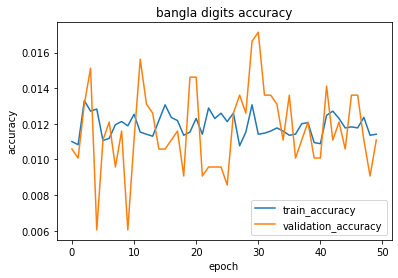

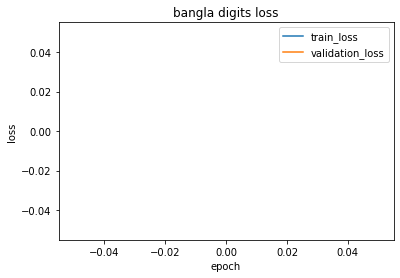

In [27]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'bangla digits accuracy')
plot_loss(history,'bangla digits loss')

In [36]:
# Loading the best saved model to make predictions



import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

model.save('best_model_3class.hdf5')
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

In [37]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(299, 299))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    char_list.sort()
    pred_value = char_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [29]:
!wget -O 0.jpg https://i.ibb.co/FKz5PRD/image.jpg
!wget -O 1.jpg https://i.ibb.co/yXmS2FZ/1.jpg
!wget -O 2.jpg https://i.ibb.co/58FnzNn/2.jpg

In [30]:
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O pizza.jpg http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
!wget -O omelette.jpg https://www.incredibleegg.org/wp-content/uploads/basic-french-omelet-930x550.jpg

In [40]:
from PIL import Image
img0 = Image.open('0.jpg')
#img1 = Image.open('1.jpg')
img2 = Image.open('2.jpg')
# img3 = Image.open('3.jpg')
# img4 = Image.open('4.jpg')
# img5 = Image.open('5.jpg')
# img6 = Image.open('6.jpg')
# img7 = Image.open('7.jpg')
# img8 = Image.open('8.jpg')
# img9 = Image.open('9.jpg')

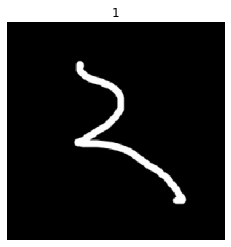

In [45]:
images = []
images.append('2.jpg')
#images.append('1.jpg')
# images.append('2.jpg')
# images.append('3.jpg')
# images.append('4.jpg')
# images.append('5.jpg')
# images.append('6.jpg')
# images.append('7.jpg')
# images.append('8.jpg')
# images.append('9.jpg')
predict_class(model_best, images, True)